<a href="https://colab.research.google.com/github/dramirezbe/Signals-Systems-UN-DRB/blob/main/6_Serie_exponencial_y_geom%C3%A9trica_de_Fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Series de Fourier:

Sea la señal:

\begin{equation}
x(t) = \begin{cases} A, & -T/2 \leq t < 0 \\ -A, & 0 \leq t < T/2 \end{cases}
\end{equation}

Su representación **exponencial** es:

\begin{equation}
\hat{x}(t) = \sum\limits_{n=-N}^N{c_n e^{jn\omega_ot}}.
\end{equation}

- Sus coeficientes $c_n$ y $c_0$se calculan:

\begin{equation}
c_n = \frac{1}{T}\int^{T/2}_{-T/2}{x(t)e^{-jn\omega_o t}}dt=\frac{jA}{n\pi}(1-(-1)^n); \quad n\neq 0
\end{equation}

\begin{equation}
c_0 = \frac{1}{T}\int^{T/2}_{-T/2}{x(t)}dt=0
\end{equation}

Su representación **trigonométrica** es:

\begin{equation}
\hat{x}(t) = a_0+\sum\limits_{n=1}^N{a_n \cos(n\omega_ot)+b_n\sin{n\omega_ot}}.
\end{equation}

- Sus coeficientes $a_n$ y $b_n$se calculan:

\begin{equation}
a_n = \frac{2}{T}\int^{T/2}_{-T/2}{x(t)\cos(n\omega_o t)}dt=2\mathsf{Re}\{c_n\}= 0; \quad n > 0
\end{equation}
\begin{equation}
a_0 = c_0 = 0.
\end{equation}

\begin{equation}
b_n = \frac{2}{T}\int^{T/2}_{-T/2}{x(t)\sin(n\omega_o t)}dt=-2\mathsf{Im}\{c_n\}=\frac{2A}{n\pi}((-1)^n-1); \quad n > 0
\end{equation}
\begin{equation}
b_0 = 0.
\end{equation}

Su represetación **compacta** es:


$$
f(t) = d_0 + \sum_{n=1}^\infty d_n \cos\left( \frac{2\pi n t}{T} - \phi_n \right)
$$

Donde sus coeficientes son:

\begin{equation}
d_n = \sqrt{a_n^2+b_n^2} = 2|c_n|; \quad n > 0
\end{equation}
\begin{equation}
d_0 = a_0;  
\end{equation}

\begin{equation}
\phi_n = \tan^{-1}\left(\frac{\mathsf{Im}\{c_n\}}{\mathsf{Re}\{c_n\}}\right) = \tan^{-1}\left(\frac{-b_n}{a_n}\right); \quad n \geq 0
\end{equation}


A continuación, se presentan las simulaciones respectivas:

## Serie de Fourier Exponencial:

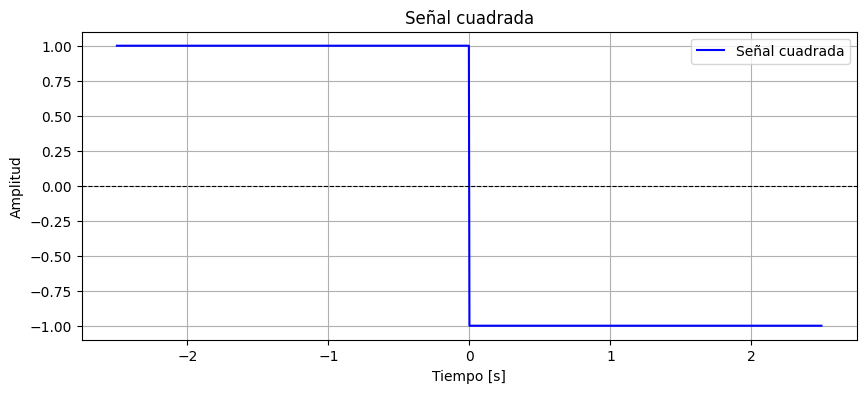

In [ ]:
A = 1 # amplitud de la señal
T = 5 # Periodo
Fs = 50 * T #Frecuencia de Muestreo
tv = np.arange(-T/2,T/2,1/Fs) #vector de tiempo generado
Nm = len(tv) #numero de muestras


# Generar la señal cuadrada
xo = np.concatenate((A*np.ones(int(Nm/2)), -A*np.ones(int(Nm/2))), axis=0) #Concatena un vector de unos con un vector de -unos

# Graficar la señal cuadrada
plt.figure(figsize=(10, 4))
plt.plot(tv, xo, label='Señal cuadrada', color='b')
plt.axhline(0, color='k', linestyle='--', linewidth=0.8)
plt.title("Señal cuadrada")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.legend()
plt.show()

<ipython-input-37-74b14abd5658>:7: RuntimeWarning: divide by zero encountered in divide
  Cn = (1j * A / (nv * np.pi)) * (1 - (-1)**nv)
<ipython-input-37-74b14abd5658>:7: RuntimeWarning: invalid value encountered in divide
  Cn = (1j * A / (nv * np.pi)) * (1 - (-1)**nv)
<ipython-input-37-74b14abd5658>:7: RuntimeWarning: invalid value encountered in multiply
  Cn = (1j * A / (nv * np.pi)) * (1 - (-1)**nv)


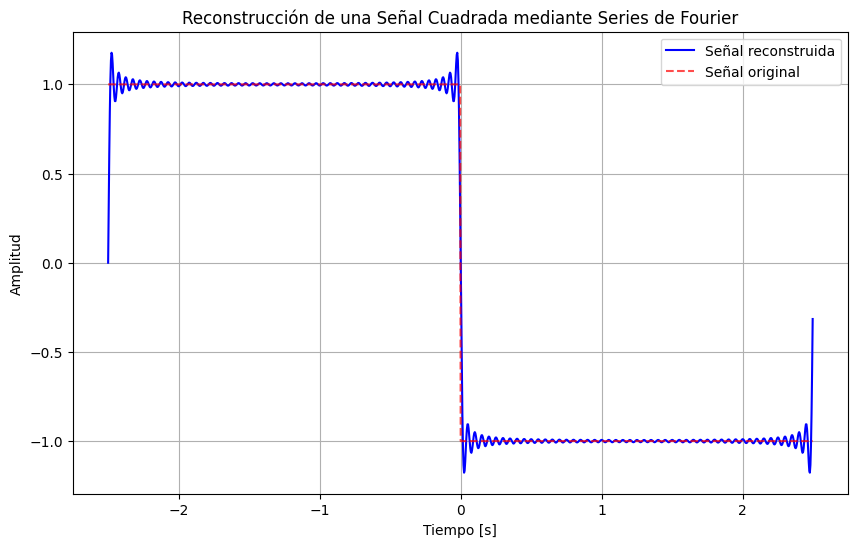

In [ ]:
N = 100 #numero armonicos
wo = 2*np.pi/T # frecuencia fundamental

# definir bases
nv = np.linspace(-N, N, 2*N+1) #vector num armónicos

Cn = (1j * A / (nv * np.pi)) * (1 - (-1)**nv)
Cn[N] = 0  # Ajuste para el término DC

# Inicializar la señal reconstruida con el término constante ao
xo_reconstructed = Cn[N]
# Recorrer los índices de la serie de Fourier desde -N hasta N (inclusive)
for k in range(-N, N + 1):
    # Sumar los términos correspondientes de la serie de Fourier
    xo_reconstructed += Cn[k+N] * np.exp(1j * k * wo * tv)

# Gráfica de la señal
plt.figure(figsize=(10, 6))
plt.plot(tv, xo_reconstructed, label='Señal reconstruida', color='b')
plt.plot(tv, xo, label='Señal original', color='r', linestyle='dashed', alpha=0.7)
plt.title('Reconstrucción de una Señal Cuadrada mediante Series de Fourier')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

Ahora modular!

<ipython-input-38-b2095989665f>:13: RuntimeWarning: divide by zero encountered in divide
  Cn = (1j * A / (nv * np.pi)) * (1 - (-1)**nv)
<ipython-input-38-b2095989665f>:13: RuntimeWarning: invalid value encountered in divide
  Cn = (1j * A / (nv * np.pi)) * (1 - (-1)**nv)
<ipython-input-38-b2095989665f>:13: RuntimeWarning: invalid value encountered in multiply
  Cn = (1j * A / (nv * np.pi)) * (1 - (-1)**nv)


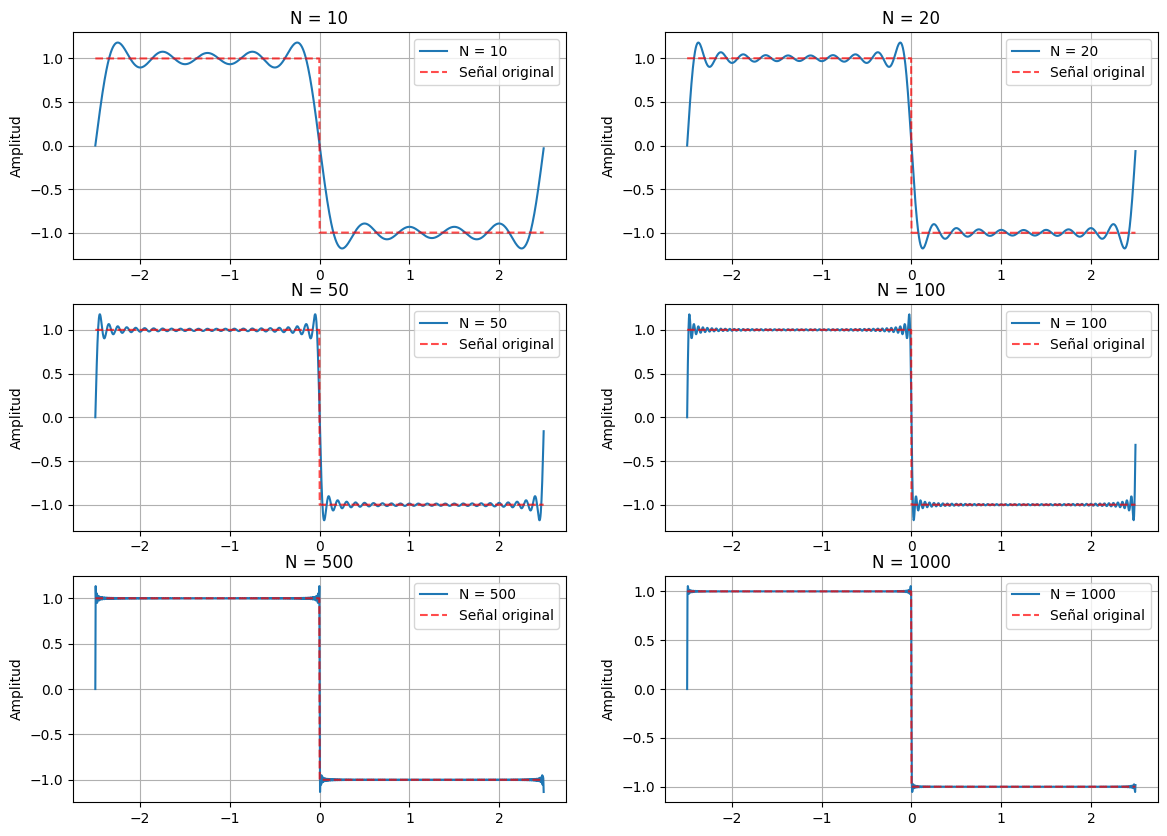

In [ ]:
def complex_series(N, A, T):
    Fs = 50 * T
    wo = 2*np.pi/T

    tv = np.arange(-T/2,T/2,1/Fs)
    Nm = len(tv)


    xo = np.concatenate((A*np.ones(int(Nm/2)), -A*np.ones(int(Nm/2))), axis=0)

    nv = np.linspace(-N, N, 2*N+1)

    Cn = (1j * A / (nv * np.pi)) * (1 - (-1)**nv)
    Cn[N] = 0

    xo_reconstructed = Cn[N] #Inicializar vector de sumatoria iniciando con Co

    for k in range(-N, N + 1):
        # Sumar los términos correspondientes de la serie de Fourier
        xo_reconstructed += Cn[k+N] * np.exp(1j * k * wo * tv)

    return tv, xo, xo_reconstructed


A = 1 # amplitud de la señal
T = 5 # segundos de gráfica
tv = np.arange(-T/2,T/2,1/Fs) #vector de tiempo generado
Nm = len(tv) #numero de muestras requeridas

Nvector = [10, 20, 50, 100, 500, 1000]

# Configurar subplots (3 filas, 2 columnas)
fig, axes = plt.subplots(3, 2, figsize=(14, 10))
axes = axes.flatten()  # Aplanar la matriz de ejes para iterar fácilmente

for ax, N in zip(axes, Nvector):
    tv, xo, xo_reconstructed = complex_series(N, A, T)
    ax.plot(tv, xo_reconstructed, label=f'N = {N}')
    ax.plot(tv, xo, label='Señal original', color='r', linestyle='dashed', alpha=0.7)
    ax.set_title(f"N = {N}")
    ax.set_ylabel("Amplitud")
    ax.legend()
    ax.grid()
plt.show()

# Serie de Fourier Trigonométrica:

In [ ]:
A = 1 # amplitud de la señal
T = 5 # segundos de gráfica
Fs = 50 * T # frecuencia de muestreo definida
tv = np.arange(-T/2,T/2,1/Fs) #vector de tiempo generado
Nm = len(tv) #numero de muestras requeridas

# Generar la señal cuadrada
xo = np.concatenate((A*np.ones(int(Nm/2)), -A*np.ones(int(Nm/2))), axis=0) #Concatena un vector de unos con un vector de -unos


<ipython-input-40-3cca5d8c3626>:7: RuntimeWarning: divide by zero encountered in divide
  Cn = (1j * A / (nv * np.pi)) * (1 - (-1)**nv) / 2
<ipython-input-40-3cca5d8c3626>:7: RuntimeWarning: invalid value encountered in divide
  Cn = (1j * A / (nv * np.pi)) * (1 - (-1)**nv) / 2
<ipython-input-40-3cca5d8c3626>:7: RuntimeWarning: invalid value encountered in multiply
  Cn = (1j * A / (nv * np.pi)) * (1 - (-1)**nv) / 2


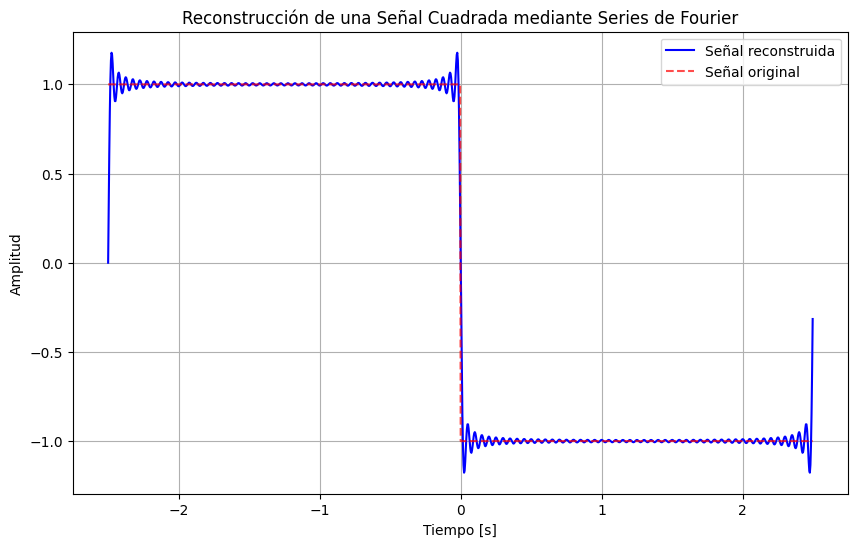

In [ ]:
N = 100 #numero armonicos
wo = 2*np.pi/T # frecuencia fundamental

# definir bases
nv = np.linspace(-N, N, 2*N+1) #vector num armónicos

Cn = (1j * A / (nv * np.pi)) * (1 - (-1)**nv) / 2
Cn[N] = 0  # Ajuste para el término DC


an = 2 * np.real(Cn)  # Coeficientes de coseno
ao = np.real(Cn[N])   # Término DC
bn = -2 * np.imag(Cn)  # Coeficientes de seno

# Inicializar la señal reconstruida con el término constante ao
xo_reconstructed = ao

# Recorrer los índices de la serie de Fourier desde -N hasta N (inclusive)
for k in range(-N, N + 1):
    # Sumar los términos correspondientes de la serie de Fourier
    xo_reconstructed += an[k + N] * np.cos(k * wo * tv) + bn[k + N] * np.sin(k * wo * tv)


# Gráfica de la señal
plt.figure(figsize=(10, 6))
plt.plot(tv, xo_reconstructed, label='Señal reconstruida', color='b')
plt.plot(tv, xo, label='Señal original', color='r', linestyle='dashed', alpha=0.7)
plt.title('Reconstrucción de una Señal Cuadrada mediante Series de Fourier')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

Ahora modular!

<ipython-input-41-8f90fefeb7a4>:12: RuntimeWarning: divide by zero encountered in divide
  Cn = (1j * A / (nv * np.pi)) * (1 - (-1)**nv) / 2
<ipython-input-41-8f90fefeb7a4>:12: RuntimeWarning: invalid value encountered in divide
  Cn = (1j * A / (nv * np.pi)) * (1 - (-1)**nv) / 2
<ipython-input-41-8f90fefeb7a4>:12: RuntimeWarning: invalid value encountered in multiply
  Cn = (1j * A / (nv * np.pi)) * (1 - (-1)**nv) / 2


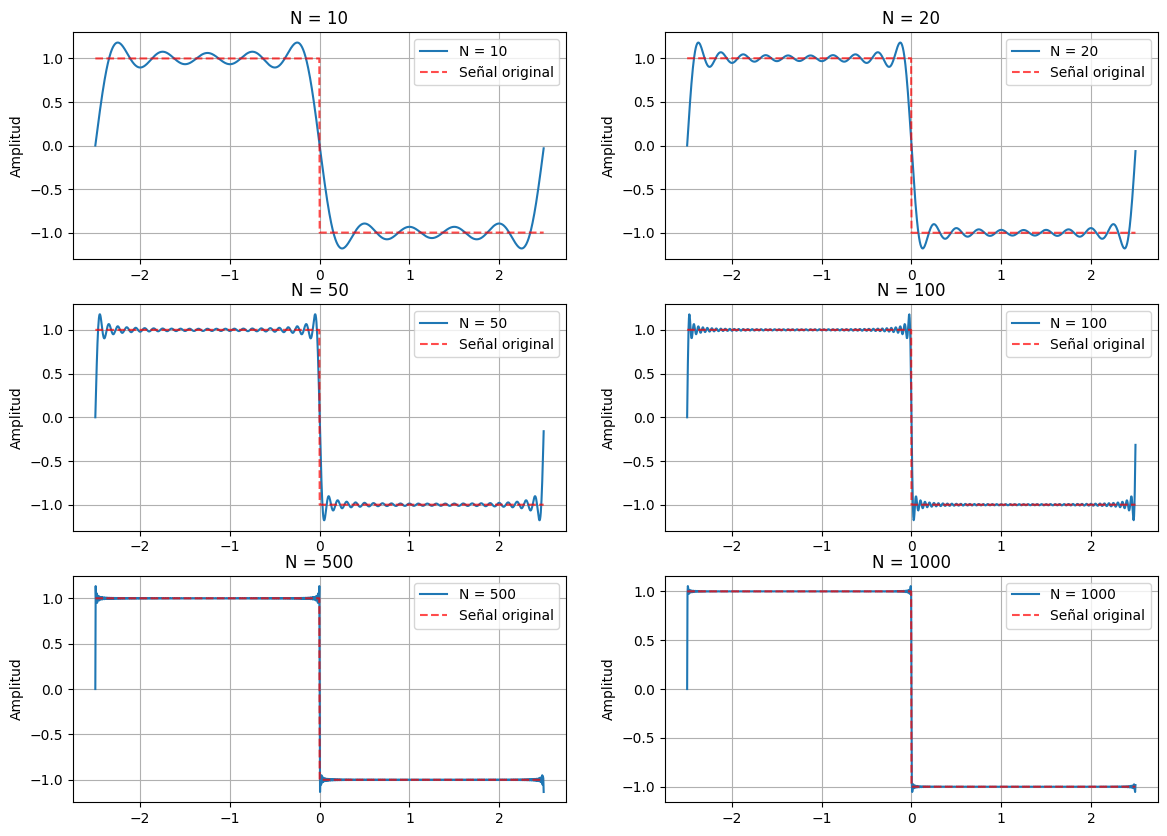

In [ ]:
def geometric_series(N, A, T):
    Fs = 50 * T
    wo = 2*np.pi/T

    tv = np.arange(-T/2,T/2,1/Fs)
    Nm = len(tv)

    xo = np.concatenate((A*np.ones(int(Nm/2)), -A*np.ones(int(Nm/2))), axis=0)

    nv = np.linspace(-N, N, 2*N+1)

    Cn = (1j * A / (nv * np.pi)) * (1 - (-1)**nv) / 2
    Cn[N] = 0

    an = 2 * np.real(Cn)  # Coeficientes de coseno
    ao = np.real(Cn[N])   # Término DC
    bn = -2 * np.imag(Cn)  # Coeficientes de seno

    # Inicializar la señal reconstruida con el término constante ao
    xo_reconstructed = ao

    # Recorrer los índices de la serie de Fourier desde -N hasta N (inclusive)
    for k in range(-N, N + 1):
        # Sumar los términos correspondientes de la serie de Fourier
        xo_reconstructed += an[k + N] * np.cos(k * wo * tv) + bn[k + N] * np.sin(k * wo * tv)

    return tv, xo, xo_reconstructed


A = 1 # amplitud de la señal
T = 5 # segundos de gráfica
tv = np.arange(-T/2,T/2,1/Fs) #vector de tiempo generado
Nm = len(tv) #numero de muestras requeridas

Nvector = [10, 20, 50, 100, 500, 1000]

# Configurar subplots (3 filas, 2 columnas)
fig, axes = plt.subplots(3, 2, figsize=(14, 10))
axes = axes.flatten()  # Aplanar la matriz de ejes para iterar fácilmente

for ax, N in zip(axes, Nvector):
    tv, xo, xo_reconstructed = geometric_series(N, A, T)
    ax.plot(tv, xo_reconstructed, label=f'N = {N}')
    ax.plot(tv, xo, label='Señal original', color='r', linestyle='dashed', alpha=0.7)
    ax.set_title(f"N = {N}")
    ax.set_ylabel("Amplitud")
    ax.legend()
    ax.grid()
plt.show()

# Serie de Fourier Trigonométrica Compacta:



<ipython-input-41-8f90fefeb7a4>:12: RuntimeWarning: divide by zero encountered in divide
  Cn = (1j * A / (nv * np.pi)) * (1 - (-1)**nv) / 2
<ipython-input-41-8f90fefeb7a4>:12: RuntimeWarning: invalid value encountered in divide
  Cn = (1j * A / (nv * np.pi)) * (1 - (-1)**nv) / 2
<ipython-input-41-8f90fefeb7a4>:12: RuntimeWarning: invalid value encountered in multiply
  Cn = (1j * A / (nv * np.pi)) * (1 - (-1)**nv) / 2


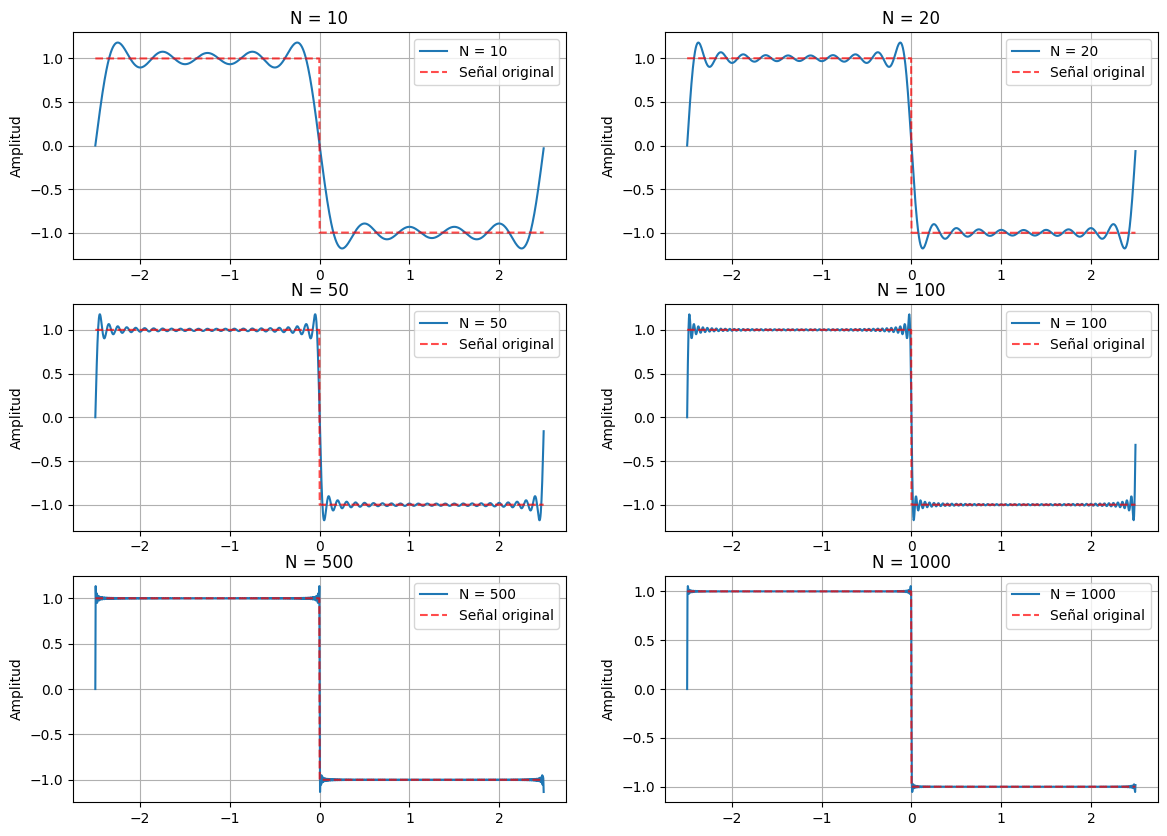

In [ ]:
def compact_series(N, A, T):
    Fs = 50 * T
    wo = 2*np.pi/T

    tv = np.arange(-T/2,T/2,1/Fs)
    Nm = len(tv)

    xo = np.concatenate((A*np.ones(int(Nm/2)), -A*np.ones(int(Nm/2))), axis=0)

    nv = np.linspace(-N, N, 2*N+1)

    Cn = (1j * A / (nv * np.pi)) * (1 - (-1)**nv) / 2
    Cn[N] = 0

    an = 2 * np.real(Cn)  # Coeficientes de coseno
    ao = np.real(Cn[N])   # Término DC
    bn = -2 * np.imag(Cn)  # Coeficientes de seno

    dn = np.sqrt(an**2 + bn**2)
    phin = np.arctan(bn/an)
    do = ao

    # Inicializar la señal reconstruida con el término constante ao
    xo_reconstructed = do

    # Recorrer los índices de la serie de Fourier desde -N hasta N (inclusive)
    for k in range(-N, N + 1):
        # Sumar los términos correspondientes de la serie de Fourier
        xo_reconstructed += dn[k + N] * np.cos(k * wo * tv + phin[k + N])

    return tv, xo, xo_reconstructed


A = 1 # amplitud de la señal
T = 5 # segundos de gráfica
tv = np.arange(-T/2,T/2,1/Fs) #vector de tiempo generado
Nm = len(tv) #numero de muestras requeridas

Nvector = [10, 20, 50, 100, 500, 1000]

# Configurar subplots (3 filas, 2 columnas)
fig, axes = plt.subplots(3, 2, figsize=(14, 10))
axes = axes.flatten()  # Aplanar la matriz de ejes para iterar fácilmente

for ax, N in zip(axes, Nvector):
    tv, xo, xo_reconstructed = geometric_series(N, A, T)
    ax.plot(tv, xo_reconstructed, label=f'N = {N}')
    ax.plot(tv, xo, label='Señal original', color='r', linestyle='dashed', alpha=0.7)
    ax.set_title(f"N = {N}")
    ax.set_ylabel("Amplitud")
    ax.legend()
    ax.grid()
plt.show()

# Ejercicio

Simular la serie trigonométrica, exponencial y compacta de una señal sierra definida como:

$$
x(t) = \frac{2A}{T} \left(t - \frac{T}{2}\right)
$$

Siendo el coeficiente $C_n$:
$$
C_n = \frac{-jA}{\pi n} | C_0 = 0
$$


Recordar:

\begin{equation}
\hat{x}(t) = \sum\limits_{n=-N}^N{c_n e^{jn\omega_ot}}.
\end{equation}

\begin{equation}
\hat{x}(t) = a_0+\sum\limits_{n=1}^N{a_n \cos(n\omega_ot)+b_n\sin{n\omega_ot}}.
\end{equation}

$$
f(t) = d_0 + \sum_{n=1}^\infty d_n \cos\left( \frac{2\pi n t}{T} - \phi_n \right)
$$

\begin{equation}
a_n =2\mathsf{Re}\{c_n\};
\end{equation}
\begin{equation}
a_0 = c_0 = 0.
\end{equation}

\begin{equation}
b_n =-2\mathsf{Im}\{c_n\}
\end{equation}
\begin{equation}
b_0 = 0.
\end{equation}

\begin{equation}
d_n = \sqrt{a_n^2+b_n^2} = 2|c_n|; \quad n > 0
\end{equation}
\begin{equation}
d_0 = a_0;  
\end{equation}

\begin{equation}
\phi_n = \tan^{-1}\left(\frac{\mathsf{Im}\{c_n\}}{\mathsf{Re}\{c_n\}}\right) = \tan^{-1}\left(\frac{-b_n}{a_n}\right); \quad n \geq 0
\end{equation}

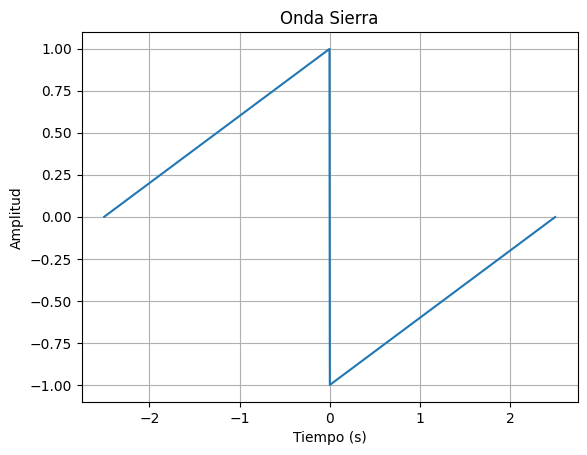

In [ ]:
#Código Inicial de Ayuda

A = 1
T = 5
Fs = 50 * T
tv = np.arange(-T / 2, T / 2, 1 / Fs)  # Tiempo
Nm = len(tv)  # Número de muestras

# Onda sierra periódica
xo = (2 * A / T) * (np.mod(tv, T) - T / 2)

plt.plot(tv, xo)
plt.title("Onda Sierra")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid()
plt.show()